Gregor von Laszewski, laszewski@gmail.com

# 0. Introduction

This ipython script demonstrates how easy it is to interface java and python with ipython by using ipython as shell and postprocessing the data with matplotlib and/or pandas

The code to this ipython notebook can be found at 

* https://github.com/cloudmesh/cloudmesh/blob/master/ipython/

In particular this notebook is in 

* https://github.com/cloudmesh/cloudmesh/blob/master/ipython/Lesson%207%20-%20Interfaceing%20with%20Java.ipynb
    
The java code is in 

* https://github.com/cloudmesh/cloudmesh/tree/master/ipython/java

# 1. Setting Up The Environment

Several libraries may not yet be installed. Make sure you have jsonsche,ma and pandas

In [ ]:
pip install jsonschema

In [ ]:
pip install pandas

## 1.1 Lets look where we are

In [1]:
!pwd

/Users/big/github/cloudmesh-new/cloudmesh/ipython


## 1.2 Just in case lest just clean the environment

In [2]:
!cd java; rm -f data.csv *.class *~

## 1.3 Is Java available?

In [3]:
!which java

/usr/bin/java


# 2. Program to interface with Java

## 2.1 Looking at the program

The program we use will just print a small number of values in csv format into a file so we can read it for plotting

In [4]:
!ls java

data.java


Looking at the contenst of the file java/data.java

In [5]:
!cat java/data.java

import java.io.*;

class data {
    public static void main(String args[]){
        try{	     
	    File r = new File("data.csv");
	    FileWriter pw = new FileWriter(r);
	    PrintWriter pr = new PrintWriter(pw);
	    pr.println("x,y");
	    pr.println("0.1,1");
	    pr.println("1.2,2");
	    pr.println("2.3,1.5");
	    pr.close();
	} catch(IOException e) {}
    }
}

Compiling the code

In [6]:
!cd java; javac data.java

Looking at the output

In [7]:
!ls java/*.class

java/data.class


# 3. Generating the Data

In [8]:
!cd java; java data

Looking if the data is created

In [9]:
!cat java/data.csv

x,y
0.1,1
1.2,2
2.3,1.5


# 4. Plotting

Enable inline plotting

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Importing the usual plotting libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data from csv

In [15]:
data = pd.read_csv('java/data.csv')

In [16]:
print data

     x    y
0  0.1  1.0
1  1.2  2.0
2  2.3  1.5


Creating the Data frame

In [17]:
df = pd.DataFrame(data, columns=['x', 'y'])

In [18]:
df

,x,y
0,0.1,1.0
1,1.2,2.0
2,2.3,1.5


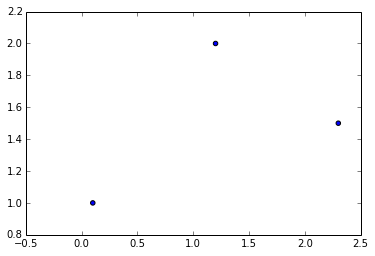

In [19]:
plt.scatter(df.x, df.y)